# 201600779 김영민

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [2]:
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))


285

285

Text(0.5, 1.0, 'actual Derivatives vs. Estimates')

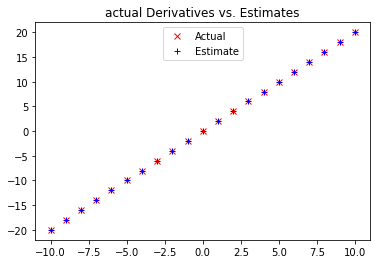

In [4]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

# 두 계산식의 결괏값이 거의 비슷함을 보여 주기 위한 그래프
# plot to show they're basically the same
import matplotlib.pyplot as plt    
plt.title("actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')      	# red  x
plt.plot(xs, estimates, 'b+', label='Estimate')  	# blue +
plt.legend(loc=9)
plt.show()                                       		# purple *, hopefully


In [5]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]


In [6]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)	# compute the gradient at v
    next_v = step(v, gradient, -0.0001)     	# take a negative gradient step
    if distance(next_v, v) < tolerance:     	# stop if we're converging
        break
    v = next_v                              		# continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))


minimum v [-0.00025122741842296075, -0.00035171838579213847, -0.00025122741842296075]
minimum value 2.499362544391583e-07


In [7]:
# Using gradient descent to fit models

def gradient_step(v, gradient, step_size):
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return vector_add(v, step)

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
print(inputs)

#def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad


[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [11]:
#from linear_algebra import vector_mean
from tqdm import tqdm
# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = .001

for epoch in tqdm(range(5000)):
    # Computer the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


 13%|█████████▋                                                                   | 628/5000 [00:00<00:00, 6218.67it/s]

0 [33.455513154085374, 0.5216896398844648]
1 [11.020694415864945, 0.5441017737587813]
2 [25.984740926391844, 0.5440342646271287]
3 [16.00372183636127, 0.5589309370242662]
4 [22.661076466084058, 0.5638167969865789]
5 [18.220625813918918, 0.5753502398586898]
6 [21.18241793235594, 0.5824201651928913]
7 [19.20690965928378, 0.5924377427948615]
8 [20.524583695000512, 0.6004597769685555]
9 [19.645703135211626, 0.6097834411096188]
10 [20.231925792254955, 0.6182095773626112]
11 [19.840923706143307, 0.627205084000141]
12 [20.101731093086414, 0.635791597538284]
13 [19.9277811525089, 0.6446217454362938]
14 [20.043814593022, 0.65326028309793]
15 [19.966428926737425, 0.6619975771247563]
16 [20.018053903443263, 0.6706400108972441]
17 [19.98362868641424, 0.6793167847788929]
18 [20.006598982946482, 0.6879417798957493]
19 [19.99128642015459, 0.6965724953189043]
20 [20.001508530252206, 0.7051706367484211]
21 [19.99469898095853, 0.7137618040051764]
22 [19.999249541504668, 0.7223289793781246]
23 [19.996222

 36%|███████████████████████████▏                                                | 1792/5000 [00:00<00:00, 5104.21it/s]

 [19.99966372981254, 4.4401099359143625]
1039 [19.99966440215095, 4.441229379772347]
1040 [19.99966507314509, 4.442346585414953]
1041 [19.999665742797642, 4.443461557317268]
1042 [19.99966641111129, 4.444574299945431]
1043 [19.999667078088716, 4.445684817756652]
1044 [19.999667743732584, 4.4467931151992275]
1045 [19.999668408045565, 4.447899196712561]
1046 [19.999669071030322, 4.449003066727182]
1047 [19.9996697326895, 4.4501047296647585]
1048 [19.999670393025767, 4.451204189938118]
1049 [19.99967105204175, 4.452301451951268]
1050 [19.999671709740102, 4.453396520099407]
1051 [19.999672366123452, 4.454489398768948]
1052 [19.999673021194425, 4.4555800923375335]
1053 [19.999673674955655, 4.456668605174053]
1054 [19.999674327409753, 4.45775494163866]
1055 [19.999674978559334, 4.4588391060827925]
1056 [19.999675628407008, 4.4599211028491865]
1057 [19.999676276955373, 4.461000936271895]
1058 [19.999676924207037, 4.462078610676307]
1059 [19.999677570164582, 4.463154130379161]
1060 [19.9996782

 46%|███████████████████████████████████                                         | 2307/5000 [00:00<00:00, 4895.02it/s]

 [19.999948858476998, 4.914849333485921]
1980 [19.999948960729327, 4.915019583677426]
1981 [19.999949062777215, 4.915189493470801]
1982 [19.999949164621068, 4.915359063546637]
1983 [19.999949266261293, 4.915528294584164]
1984 [19.999949367698303, 4.915697187261257]
1985 [19.999949468932492, 4.915865742254433]
1986 [19.999949569964283, 4.916033960238857]
1987 [19.999949670794063, 4.916201841888343]
1988 [19.999949771422248, 4.916369387875361]
1989 [19.999949871849235, 4.916536598871033]
1990 [19.99994997207543, 4.916703475545139]
1991 [19.99995007210123, 4.916870018566125]
1992 [19.999950171927043, 4.917036228601094]
1993 [19.999950271553264, 4.917202106315819]
1994 [19.99995037098029, 4.9173676523747405]
1995 [19.99995047020852, 4.917532867440971]
1996 [19.999950569238358, 4.917697752176298]
1997 [19.99995066807019, 4.917862307241183]
1998 [19.999950766704423, 4.918026533294771]
1999 [19.999950865141447, 4.918190430994886]
2000 [19.99995096338165, 4.918354000998038]
2001 [19.9999510614

 69%|████████████████████████████████████████████████████▍                       | 3451/5000 [00:00<00:00, 5101.79it/s]

 [19.99999229960574, 4.987178838928966]
2926 [19.9999923150019, 4.987204473550714]
2927 [19.999992330367284, 4.987230056918615]
2928 [19.99999234570194, 4.987255589135145]
2929 [19.99999236100594, 4.987281070302577]
2930 [19.99999237627934, 4.987306500522978]
2931 [19.999992391522202, 4.987331879898211]
2932 [19.999992406734588, 4.987357208529938]
2933 [19.99999242191656, 4.987382486519612]
2934 [19.999992437068176, 4.98740771396849]
2935 [19.999992452189495, 4.987432890977621]
2936 [19.999992467280585, 4.987458017647855]
2937 [19.999992482341497, 4.98748309407984]
2938 [19.9999924973723, 4.987508120374022]
2939 [19.99999251237305, 4.987533096630646]
2940 [19.999992527343807, 4.987558022949758]
2941 [19.99999254228463, 4.987582899431202]
2942 [19.999992557195583, 4.987607726174624]
2943 [19.99999257207672, 4.98763250327947]
2944 [19.999992586928105, 4.987657230844988]
2945 [19.9999926017498, 4.9876819089702265]
2946 [19.999992616541853, 4.987706537754036]
2947 [19.999992631304337, 4.98

 92%|█████████████████████████████████████████████████████████████████████▋      | 4582/5000 [00:00<00:00, 5184.98it/s]

 [19.99999882183574, 4.998038355795474]
3864 [19.99999882419136, 4.998042277905719]
3865 [19.99999882654227, 4.998046192174098]
3866 [19.99999882888848, 4.998050098616292]
3867 [19.999998831230002, 4.998053997247948]
3868 [19.99999883356684, 4.998057888084682]
3869 [19.999998835899003, 4.99806177114208]
3870 [19.999998838226507, 4.998065646435695]
3871 [19.999998840549356, 4.99806951398105]
3872 [19.99999884286756, 4.998073373793637]
3873 [19.999998845181132, 4.998077225888917]
3874 [19.999998847490073, 4.99808107028232]
3875 [19.999998849794405, 4.998084906989246]
3876 [19.99999885209412, 4.998088736025061]
3877 [19.999998854389247, 4.998092557405106]
3878 [19.999998856679778, 4.998096371144685]
3879 [19.999998858965732, 4.998100177259076]
3880 [19.999998861247114, 4.998103975763524]
3881 [19.99999886352394, 4.998107766673244]
3882 [19.999998865796208, 4.998111550003421]
3883 [19.999998868063933, 4.998115325769211]
3884 [19.999998870327126, 4.9981190939857365]
3885 [19.999998872585792

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5273.12it/s]

 [19.999999855649655, 4.999759656591084]
4913 [19.99999985593827, 4.999760137133551]
4914 [19.999999856226307, 4.999760616715222]
4915 [19.999999856513767, 4.999761095338018]
4916 [19.999999856800656, 4.999761573003855]
4917 [19.999999857086966, 4.999762049714648]
4918 [19.999999857372707, 4.999762525472305]
4919 [19.999999857657876, 4.999763000278733]
4920 [19.999999857942477, 4.999763474135833]
4921 [19.999999858226502, 4.999763947045504]
4922 [19.99999985850997, 4.999764419009639]
4923 [19.99999985879286, 4.99976489003013]
4924 [19.999999859075192, 4.999765360108863]
4925 [19.999999859356954, 4.99976582924772]
4926 [19.99999985963816, 4.9997662974485815]
4927 [19.9999998599188, 4.999766764713322]
4928 [19.999999860198876, 4.999767231043815]
4929 [19.999999860478393, 4.999767696441926]
4930 [19.999999860757352, 4.99976816090952]
4931 [19.999999861035757, 4.999768624448458]
4932 [19.999999861313597, 4.999769087060597]
4933 [19.99999986159089, 4.999769548747789]
4934 [19.99999986186762

In [13]:
# Minibatch and Stochastic Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in tqdm(range(1000)):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


 52%|████████████████████████████████████████▎                                    | 523/1000 [00:00<00:00, 5218.31it/s]

0 [18.243956744060227, 3.335433390045219]
1 [19.848273309177713, 3.2372861187527056]
2 [19.919219513694117, 3.2235721710101783]
3 [20.06190108450077, 3.257692140155898]
4 [19.936443539000372, 3.3333079888194277]
5 [20.32244942370494, 3.352872010524511]
6 [20.043277358211324, 3.3628005643119545]
7 [20.01027339643649, 3.3724818544303123]
8 [20.079110854714763, 3.379070610158875]
9 [20.119143708036972, 3.382988754420521]
10 [20.071792341069994, 3.377912506013401]
11 [20.266008990640408, 3.4161131804538085]
12 [20.08269765545043, 3.379425051724584]
13 [19.914347299172196, 3.3848464814396024]
14 [19.306106739887515, 3.431412788768766]
15 [19.966095221578193, 3.442977694807529]
16 [19.845233039557552, 3.4568740836085268]
17 [19.91379609334527, 3.469987399246446]
18 [20.016495654442984, 3.4819467074007546]
19 [19.98260749556711, 3.487009476792669]
20 [19.941246188132666, 3.5019694519891496]
21 [20.066786339635982, 3.504744044678989]
22 [20.245345125694435, 3.5400163514932816]
23 [19.932924091

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5263.20it/s]

980 [19.99999982247946, 4.999994500046266]
981 [19.999999742926054, 4.999994749401998]
982 [20.000000006990255, 4.999994783538975]
983 [20.000000368801153, 4.999994826822457]
984 [19.999999810408323, 4.999995060115245]
985 [19.999997732403077, 4.999995202162444]
986 [19.999999848666402, 4.999995254195499]
987 [20.000000940563485, 4.999995310132948]
988 [20.00000040376351, 4.999995323046248]
989 [19.999999329464373, 4.999995337172871]
990 [19.99999979113761, 4.999995308016517]
991 [19.999999709085888, 4.999995319228077]
992 [20.000000055809856, 4.999995353794037]
993 [19.99999981408207, 4.999995452777041]
994 [19.99999791911705, 4.999995583579631]
995 [19.999999855986502, 4.999995634870122]
996 [20.00000024273443, 4.999995673989577]
997 [19.99999981594934, 4.999995678542074]
998 [20.00000004103653, 4.999995706073812]
999 [20.000000057750913, 4.99999571765724]


# 201600779 김영민